In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

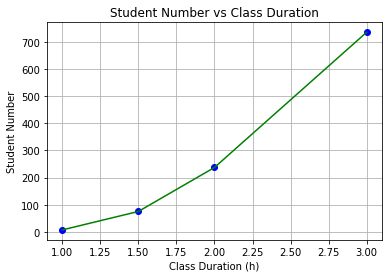

In [2]:
class_duration = [[1], [1.5], [2], [3]]
student_number = [[7], [75], [237], [735]]

plt.figure(1)
plt.title('Student Number vs Class Duration')
plt.xlabel('Class Duration (h)')
plt.ylabel('Student Number')
plt.grid(True)
plt.plot(class_duration, student_number,'bo', class_duration, student_number, 'g')
plt.show()

In [3]:
from sklearn import datasets, linear_model
model = linear_model.LinearRegression()
model.fit(class_duration, student_number)
R_square = model.score(class_duration, student_number)
print(R_square)

0.952928968059


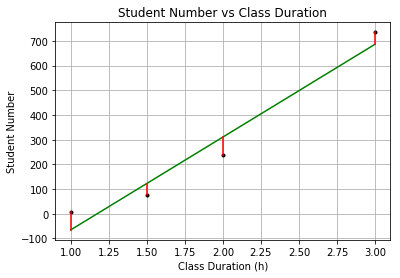

In [4]:
pre_student_number = model.predict(class_duration)
plt.plot(class_duration, student_number, 'k.')
plt.plot(class_duration, pre_student_number, 'g-')
plt.title('Student Number vs Class Duration')
plt.xlabel('Class Duration (h)')
plt.ylabel('Student Number')
plt.grid(True)

# measure the error
for idx, x in enumerate(class_duration):
    plt.plot([x, x], [student_number[idx], pre_student_number[idx]], 'r-')
plt.show()

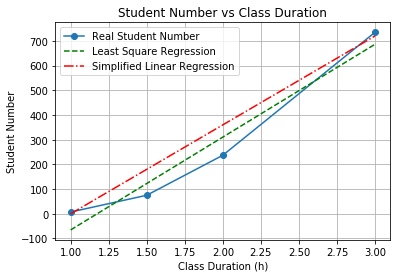

In [5]:
y = [[0], [180], [360], [720]]
plt.plot(class_duration, student_number, 'k.')
plt.plot(class_duration, student_number, 'o-', label = 'Real Student Number')
plt.plot(class_duration, pre_student_number, 'g--', label = 'Least Square Regression')
plt.plot(class_duration, y, 'r-.', label = 'Simplified Linear Regression')
plt.title('Student Number vs Class Duration')
plt.xlabel('Class Duration (h)')
plt.ylabel('Student Number')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
model2 = linear_model.LinearRegression()
model2.fit(class_duration, y)
model2.score(class_duration, student_number)

0.91851735375640919

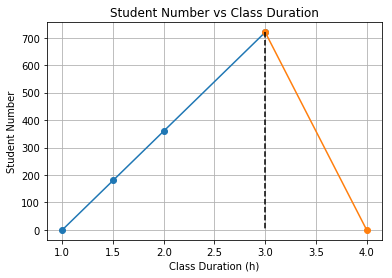

In [7]:
plt.plot(class_duration, y, 'o-')
x2 = [[3], [4]]
y2 = [[720], [0]]
plt.plot(x2, y2, 'o-')
plt.plot([3, 3], [720, 0], 'k--')
plt.title('Student Number vs Class Duration')
plt.xlabel('Class Duration (h)')
plt.ylabel('Student Number')
plt.grid(True)
plt.show()

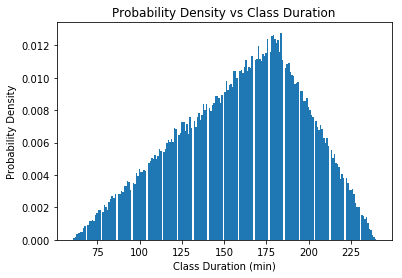

In [8]:
h = plt.hist(np.random.triangular(60, 180, 240, 100000).round(), bins = 200,
             normed=True)
plt.title('Probability Density vs Class Duration')
plt.xlabel('Class Duration (min)')
plt.ylabel('Probability Density')
plt.show()

In [9]:
def mod_pert_random(low, mode, high, modified_lambda = 4, sampleNumber = 100000):
    """Produce random numbers according to the 'Modified PERT' 
    distribution. 
    
    :param low: The lowest value expected as possible. 1h is expected here because the shortest class duration is 1h.
    :param mode: The 'most likely' statistical value. 3h is expected here because the most likely class duration is 3h.
    :param high: The highest value expected as possible, 4h is expected here because the longest allowed parking is 4h.
    :param modified_lambda: According to "Modified Pert Simulation" by Paulo Buchsbaum, Modified PERT distribution become PERT when the lambda is 4. 
                        
    """
    # Normalize the lambda to a certain range:
    modified_lambda = min(8, modified_lambda)
    modified_lambda = max(2, modified_lambda)

    # According to Paulo Buchsbaum's Formula:
    mean = (low + modified_lambda * mode + high)/(modified_lambda + 2)    
    ss =  (high - 2 * mode + low) / (mean - mode) 
    
    # Generate the parameters of Beta Distribution:
    a = (mean - low) / (high - low) * ss
    b = (high - mean) / (high - low) * ss
    
    # Generate the random number with Beta distribution and return the minutes
    beta = np.random.beta(a, b, sampleNumber)
    beta = 60 * (beta * (high - low) + low)
    return beta

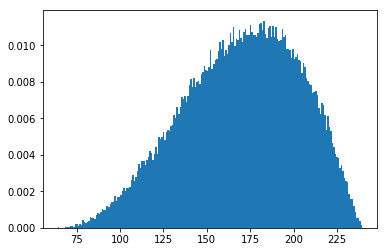

In [12]:
h = plt.hist(mod_pert_random(1, 3, 4), bins = 200,
             normed=True)